# Heart Disease Exploratory Data Analysis
This project explores a heart disease dataset to understand the factors that may contribute to heart disease. We perform data cleaning, exploratory data analysis (EDA), and visualizations to gain insights.

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv('C:/Users/amirn/OneDrive/Documents/heart_disease.csv')

In [3]:
#Display first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Dataset Overview
After previewing the first few rows of dataset, let's explore the structure of the dataset:

1. 'df.shape' - gives total number of rows and columns.
2. 'df.info()' - gives column names, datatypes, and missing values.
3. 'df.isnull().sum()' - shows number of missing values per column.

In [4]:
df.shape

(920, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### Data Cleaning
- Drop irrelevant columns (id,dataset).
- Convert num column into binary and store in a new column.
- Handle missing values (median for numerical, mode for categorical).
- Drop ca column (too many missing values).

In [7]:
#Drop unnecessary columns
df = df.drop(columns=['id','dataset'])

In [8]:
#Convert num into binary
df['heart_disease'] = df['num'].apply(lambda x: 0 if x==0 else 1)

#Drop num column
df = df.drop(columns=['num'])

In [9]:
#Numerical columns
num_col = [col for col in df.columns if df[col].dtype!='O']

#Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype=='O']

In [11]:
#Handle missing values
for col in num_col:
    df[col] = df[col].fillna(df[col].median())

for col in cat_col:
    df[col]
    df[col] = df[col].fillna(df[col].mode()[0]).astype('category')

In [12]:
#Drop 'ca' column
df = df.drop(columns=['ca'])

In [13]:
#Check the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            920 non-null    int64   
 1   sex            920 non-null    category
 2   cp             920 non-null    category
 3   trestbps       920 non-null    float64 
 4   chol           920 non-null    float64 
 5   fbs            920 non-null    category
 6   restecg        920 non-null    category
 7   thalch         920 non-null    float64 
 8   exang          920 non-null    category
 9   oldpeak        920 non-null    float64 
 10  slope          920 non-null    category
 11  thal           920 non-null    category
 12  heart_disease  920 non-null    int64   
dtypes: category(7), float64(4), int64(2)
memory usage: 50.4 KB


### Exploratory Data Analysis (EDA)
We analyze the dataset using univariate, bivariate, and multivaraite visualizations.

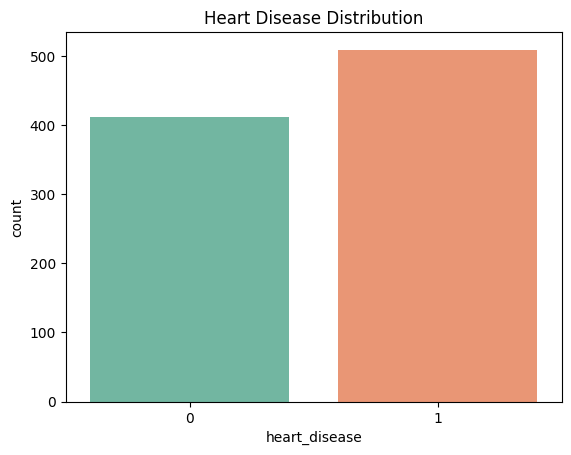

In [16]:
#Heart disease column distribution
sns.countplot(x='heart_disease', hue='heart_disease', data=df, palette='Set2', legend=False)
plt.title("Heart Disease Distribution")
plt.show()

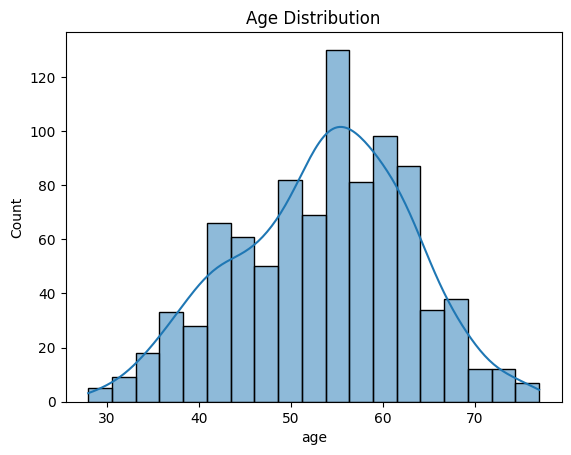

In [17]:
#Age Distribution
sns.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.show()

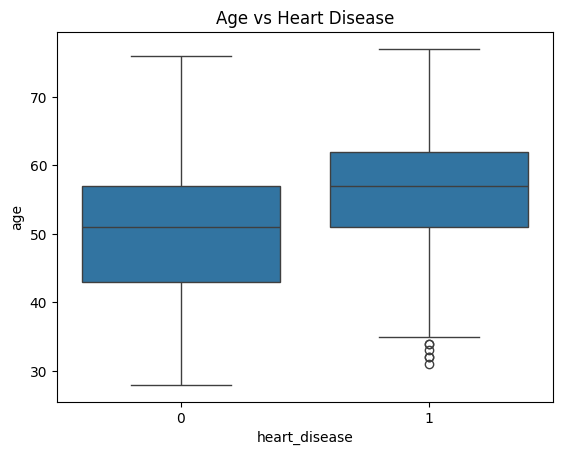

In [18]:
#Age vs Heart Disease
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

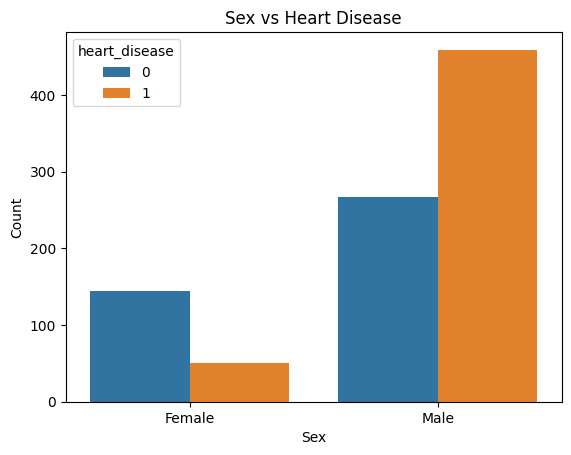

In [22]:
#Sex vs Heart Disease
sns.countplot(x='sex', hue='heart_disease', data=df)
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

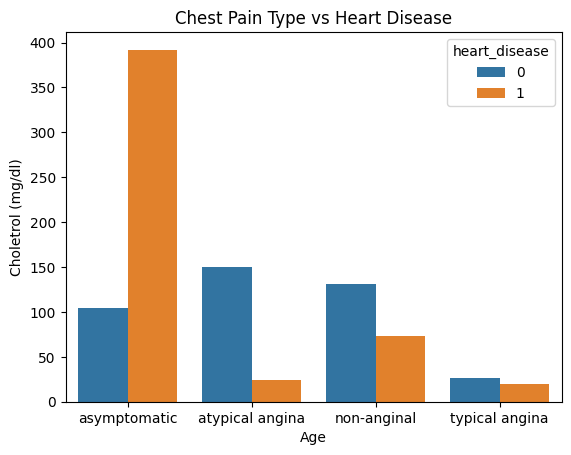

In [21]:
# Chest Pain Type vs Heart Disease
sns.countplot(x='cp', hue='heart_disease', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel('Age')
plt.ylabel('Choletrol (mg/dl)')
plt.show()

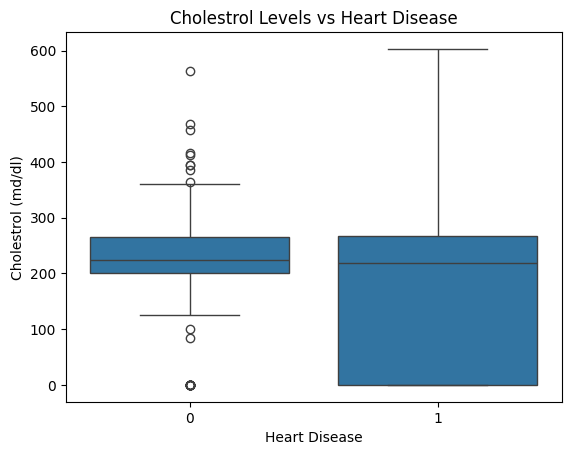

In [23]:
# Cholestrol vs Heart Disease
sns.boxplot(x='heart_disease', y='chol', data=df)
plt.title("Cholestrol Levels vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholestrol (md/dl)")
plt.show()

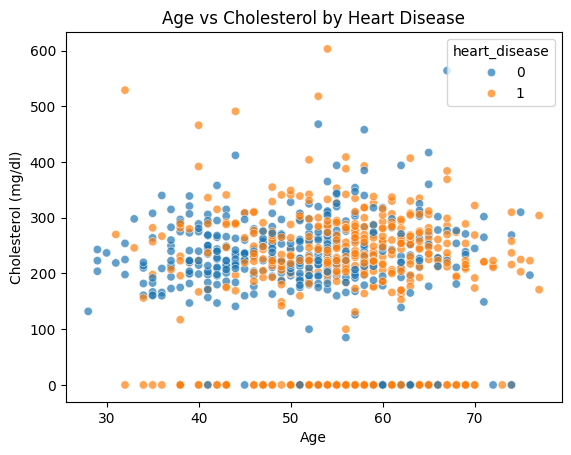

In [25]:
# Age vs Cholesterol vs Heart Disease
sns.scatterplot(x='age', y='chol', hue='heart_disease', data=df, alpha=0.7)
plt.title("Age vs Cholesterol by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()

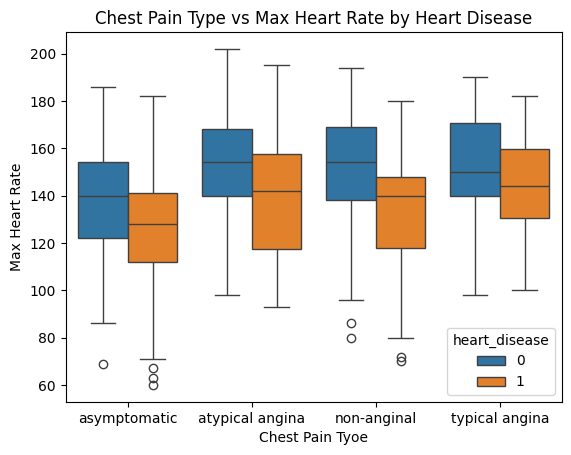

In [26]:
# Chest Pain Type vs Max Heart Rate, by Heart Disease
sns.boxplot(x='cp', y='thalch', hue='heart_disease', data=df)
plt.title("Chest Pain Type vs Max Heart Rate by Heart Disease")
plt.xlabel("Chest Pain Tyoe")
plt.ylabel("Max Heart Rate")
plt.show()

## Conclusions & Insights

- **Heart Disease Prevalence:** The dataset shows a significant proportion of patients with heart disease, making it suitable for analyzing risk factors.  
- **Age Factor:** Older individuals tend to have higher chances of heart disease. The age distribution indicates that most patients fall within the 40-70 range.  
- **Gender Differences:** Males are more frequently associated with heart disease compared to females.  
- **Chest Pain (CP) Types:** Patients with *asymptomatic* or *typical angina* chest pain are more likely to have heart disease, while *non-anginal* and *atypical angina* are less associated.  
- **Cholesterol:** Higher cholesterol levels show some association with heart disease, though the overlap suggests it is not the only risk factor.  
- **Max Heart Rate (Thalach):** Patients without heart disease generally achieve higher maximum heart rates, indicating its potential as a predictive feature. 
